# Pandas Data Visualization


Feng Li

School of Statistics and Mathematics

Central University of Finance and Economics

[feng.li@cufe.edu.cn](mailto:feng.li@cufe.edu.cn)

[https://feng.li/python](https://feng.li/python)

## Plot within Pandas

Pandas provide the basics in pandas to easily create decent looking plots. This section demonstrates visualization through charting. Pandas uses the standard convention for referencing the `matplotlib` API. You have to install `matplotlib` first before you use:

```sh
pip3 install matplotlib --user
```

- [Pandas plot](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)


In [1]:
import matplotlib.pyplot as plt
import pandas as pd


### Basic plotting: plot

- The plot method on `Series` and `DataFrame` is just a simple wrapper around `plt.plot()`:

In [2]:
import numpy as np
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts

2000-01-01   -1.473910
2000-01-02   -0.947044
2000-01-03    0.354257
2000-01-04    1.081735
2000-01-05   -0.121218
                ...   
2002-09-22   -1.395644
2002-09-23   -1.096312
2002-09-24   -0.814845
2002-09-25    1.115848
2002-09-26   -0.004515
Freq: D, Length: 1000, dtype: float64

<AxesSubplot:>

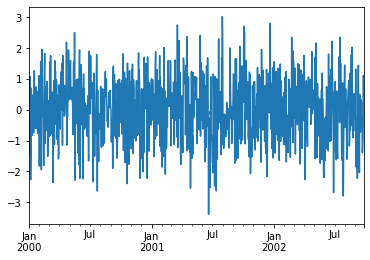

In [3]:
ts.plot()

<AxesSubplot:>

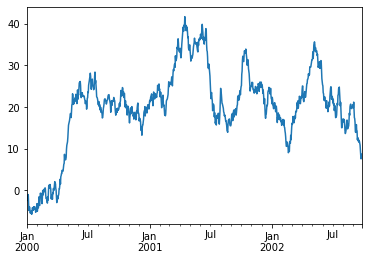

In [4]:
ts2 = ts.cumsum()
ts2.plot()

- On DataFrame, plot() is a convenience to plot all of the columns with labels:

In [5]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list("ABCD"))
df

A         B         C         D
2000-01-01 -0.669035 -1.360874 -1.019936  0.979693
2000-01-02  1.677242 -0.649723 -0.208590 -0.628792
2000-01-03 -0.734900  1.171610  1.795734 -0.228767
2000-01-04  1.892811 -0.163232  0.998399  0.978396
2000-01-05 -0.701403 -0.089810  1.914202  0.401459
...              ...       ...       ...       ...
2002-09-22  1.193628  0.570094  0.481622 -1.106532
2002-09-23  0.749351  0.565093 -2.290245 -1.491666
2002-09-24  0.082742  2.089998  1.298623  0.990459
2002-09-25 -3.236171 -0.101329 -2.281272 -0.963969
2002-09-26 -0.243259  0.537689  0.979776 -0.630714

[1000 rows x 4 columns]

<AxesSubplot:>

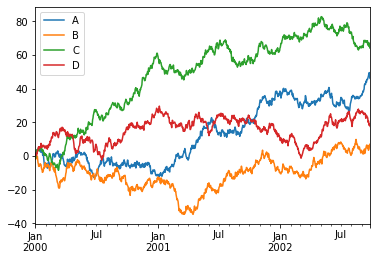

In [6]:
df = df.cumsum()
df.plot()

- To plot data on a secondary y-axis, use the `secondary_y` keyword:

<Figure size 432x288 with 0 Axes>

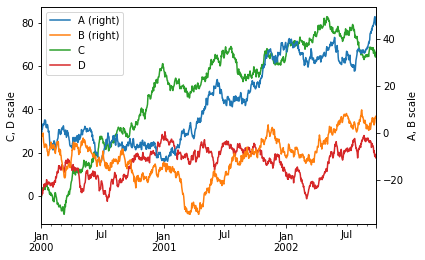

In [7]:
plt.figure();
ax = df.plot(secondary_y=["A", "B"])
ax.set_ylabel("C, D scale");
ax.right_ax.set_ylabel("A, B scale");

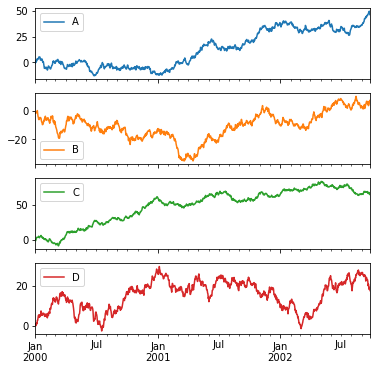

In [8]:
df.plot(subplots=True, figsize=(6, 6));

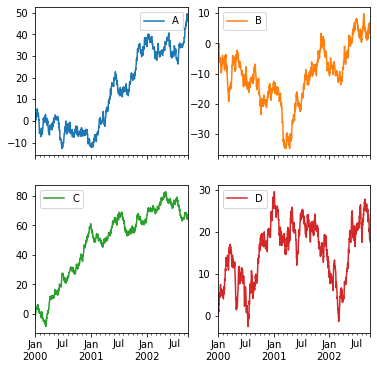

In [9]:
df.plot(subplots=True, layout=(2, 2), figsize=(6, 6), sharex=True);

- You can plot one column versus another using the `x` and `y` keywords in `plot()`:

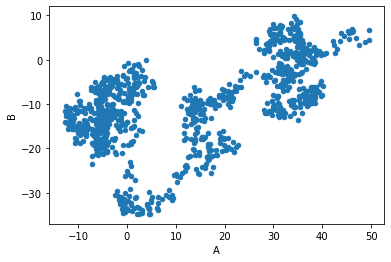

In [10]:
df.plot(x="A", y="B", kind="scatter")

- Plotting methods allow for a handful of plot styles other than the default line plot. These methods can be provided as the kind keyword argument to plot(), and include:

    - `bar` or `barh` for bar plots

    - `hist` for histogram

    - `box` for boxplot

    - `kde` or `density` for density plots

    - `area` for area plots

    - `scatter` for scatter plots

    - `hexbin` for hexagonal bin plots

    - `pie` for pie plots

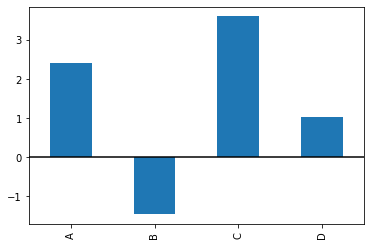

In [11]:
plt.figure()
df.iloc[5].plot.bar()
plt.axhline(0, color="k")

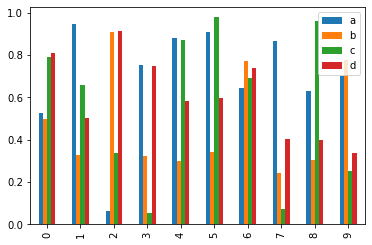

In [12]:
df2 = pd.DataFrame(np.random.rand(10, 4), columns=["a", "b", "c", "d"])
df2.plot.bar()

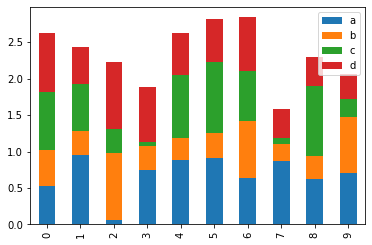

In [13]:
df2.plot.bar(stacked=True);

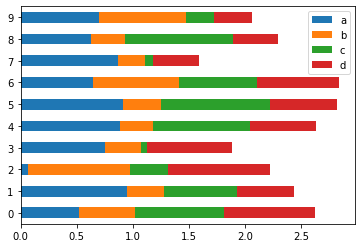

In [14]:
df2.plot.barh(stacked=True);

- Boxplot can be drawn calling `Series.plot.box()` and `DataFrame.plot.box()`, or `DataFrame.boxplot()` to visualize the distribution of values within each column.



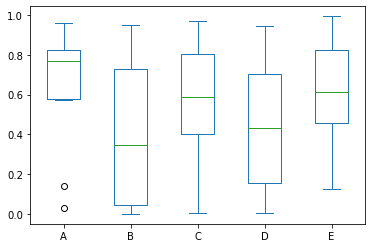

In [15]:
df4 = pd.DataFrame(np.random.rand(10, 5), columns=["A", "B", "C", "D", "E"])

df4.plot.box();

## Area plot

- You can create area plots with `Series.plot.area()` and `DataFrame.plot.area()`. Area plots are stacked by default. To produce stacked area plot, each column must be either all positive or all negative values.

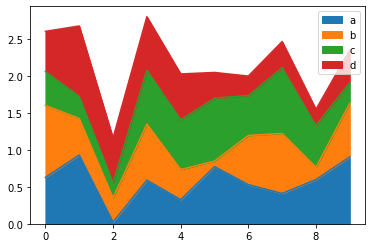

In [16]:
df5 = pd.DataFrame(np.random.rand(10, 4), columns=["a", "b", "c", "d"])

df5.plot.area();

- To produce an unstacked plot, pass `stacked=False`. Alpha value is set to 0.5 unless otherwise specified:

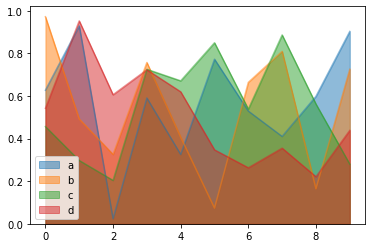

In [17]:
df5.plot.area(stacked=False);

## Scatter plot

- Scatter plot can be drawn by using the `DataFrame.plot.scatter()` method. Scatter plot requires numeric columns for the `x` and `y` axes. These can be specified by the `x` and `y` keywords.

In [18]:
import numpy as np
df = pd.DataFrame(np.random.rand(50, 4), columns=["a", "b", "c", "d"])
df["species"] = pd.Categorical(
    ["setosa"] * 20 + ["versicolor"] * 20 + ["virginica"] * 10)
df

a         b         c         d     species
0   0.829634  0.736783  0.261702  0.193386      setosa
1   0.911153  0.419372  0.764008  0.829193      setosa
2   0.952910  0.989072  0.135449  0.726242      setosa
3   0.835357  0.505718  0.695249  0.658092      setosa
4   0.273602  0.894777  0.167112  0.849104      setosa
5   0.112161  0.321692  0.525190  0.504617      setosa
6   0.485931  0.672482  0.508185  0.446647      setosa
7   0.961216  0.929337  0.575983  0.518848      setosa
8   0.388551  0.303547  0.519219  0.191637      setosa
9   0.921188  0.935272  0.314077  0.639557      setosa
10  0.940223  0.201431  0.329552  0.686811      setosa
11  0.291310  0.233028  0.595589  0.908610      setosa
12  0.094035  0.602216  0.614800  0.995167      setosa
13  0.227287  0.766969  0.511284  0.389168      setosa
14  0.552372  0.864271  0.560369  0.991117      setosa
15  0.641082  0.942939  0.579271  0.120085      setosa
16  0.179040  0.738828  0.691198  0.002092      setosa
17  0.361708  0.152825  0.954904  0.114083      setosa
18  0.884529  0.820541  0.099396  0.233853      setosa
19  0.447590  0.501434  0.852245  0.819603      setosa
20  0.174967  0.719492  0.557812  0.044909  versicolor
21  0.236692  0.923369  0.119679  0.073185  versicolor
22  0.038410  0.897120  0.334372  0.724111  versicolor
23  0.287369  0.339598  0.403237  0.230662  versicolor
24  0.016391  0.416675  0.382465  0.504789  versicolor
25  0.707238  0.278726  0.568196  0.291667  versicolor
26  0.446536  0.672371  0.997601  0.723074  versicolor
27  0.177259  0.527396  0.954444  0.308312  versicolor
28  0.385002  0.251081  0.142673  0.097961  versicolor
29  0.414637  0.512343  0.214940  0.303209  versicolor
30  0.461065  0.310299  0.812599  0.222754  versicolor
31  0.679068  0.486953  0.997664  0.698419  versicolor
32  0.014557  0.005532  0.892814  0.001630  versicolor
33  0.510225  0.474914  0.404952  0.599638  versicolor
34  0.666406  0.402967  0.895481  0.871515  versicolor
35  0.457762  0.535438  0.049200  0.933645  versicolor
36  0.741729  0.774966  0.306492  0.918807  versicolor
37  0.055785  0.269289  0.141268  0.256702  versicolor
38  0.906972  0.168197  0.110812  0.336639  versicolor
39  0.060806  0.542802  0.196161  0.132549  versicolor
40  0.198089  0.164904  0.291279  0.038471   virginica
41  0.308591  0.714715  0.202786  0.432081   virginica
42  0.700326  0.756655  0.085023  0.363134   virginica
43  0.133076  0.392832  0.683437  0.831690   virginica
44  0.842299  0.319654  0.970484  0.191483   virginica
45  0.332679  0.630887  0.532070  0.871402   virginica
46  0.439732  0.373100  0.030907  0.807853   virginica
47  0.393857  0.767928  0.148180  0.974557   virginica
48  0.756885  0.547357  0.820595  0.905695   virginica
49  0.736046  0.061893  0.028358  0.923899   virginica

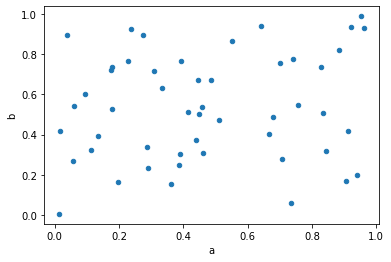

In [19]:
df.plot.scatter(x="a", y="b");

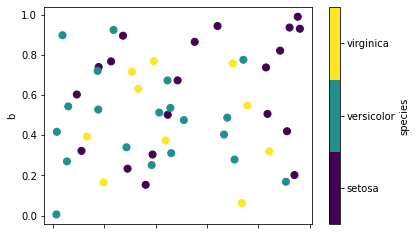

In [20]:
# The keyword c may be given as the name of a column to provide colors for each point:
df.plot.scatter(x="a", y="b", c="species", cmap="viridis", s=50);

## Hexagonal bin plot

- You can create hexagonal bin plots with `DataFrame.plot.hexbin()`. Hexbin plots can be a useful alternative to scatter plots if your data are too dense to plot each point individually.

In [21]:
df = pd.DataFrame(np.random.randn(10000, 2), columns=["a", "b"])
df["b"] = df["b"] + np.arange(10000)

<AxesSubplot:xlabel='a', ylabel='b'>

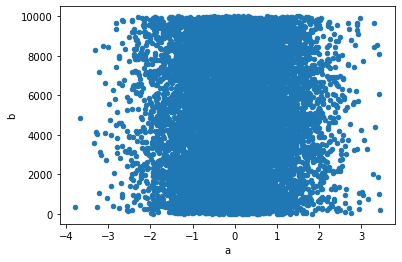

In [22]:
df.plot.scatter(x="a", y="b") # bad scatter plot without hexbin

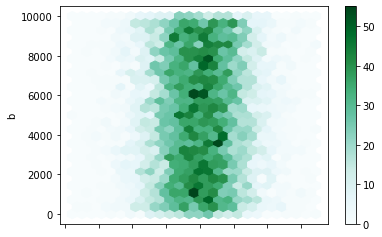

In [23]:
df.plot.hexbin(x="a", y="b", gridsize=25);

## Andrews curves

Andrews curves allow one to plot multivariate data as a large number of curves that are created using the attributes of samples as coefficients for Fourier series, see the Wikipedia entry for more information. By coloring these curves differently for each class it is possible to visualize data clustering. Curves belonging to samples of the same class will usually be closer together and form larger structures.



In [6]:
import os
os.getcwd()

'/home/fli/carbon/teaching/python/python-slides/P03-Data-Visualization-with-Python'

In [24]:
iris = pd.read_csv("data/iris.csv")
iris

sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]

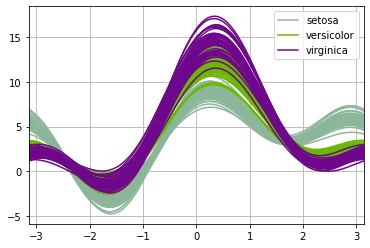

In [26]:
from pandas.plotting import andrews_curves
plt.figure()
andrews_curves(iris, "species");

## Parallel coordinates

- Parallel coordinates is a plotting technique for plotting multivariate data. 

- Parallel coordinates allows one to see clusters in data and to estimate other statistics visually. Using parallel coordinates points are represented as connected line segments. 

- Each vertical line represents one attribute. One set of connected line segments represents one data point. Points that tend to cluster will appear closer together.


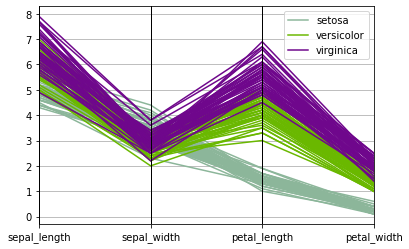

In [28]:
from pandas.plotting import parallel_coordinates
parallel_coordinates(iris, "species");

## Radar Chart

Install the `plotly` module in a terminal

```sh
pip3 install plotly -U
```

In [3]:
import pandas as pd
df = pd.DataFrame(dict(
    r=[1, 5, 2, 2, 3],
    theta=['processing cost','mechanical properties','chemical stability',
           'thermal stability', 'device integration']))
df

r                  theta
0  1        processing cost
1  5  mechanical properties
2  2     chemical stability
3  2      thermal stability
4  3     device integration

In [4]:
## This allows for saving the notebook as interactive html
import plotly.io as pio
pio.renderers.default='notebook'

In [7]:
import plotly.express as px
fig = px.line_polar(df, r='r', theta='theta', line_close=True)
fig.update_traces(fill='toself')